In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm,multivariate_normal

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 2 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = np.linspace(-20,20,200)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
print(intensity)
print(x[1],x[-2])

[1.38389653e-87 7.55505586e-86 3.96118323e-84 1.99464391e-82
 9.64626102e-81 4.48028700e-79 1.99850782e-77 8.56168137e-76
 3.52261728e-74 1.39195454e-72 5.28247967e-71 1.92532393e-69
 6.73942699e-68 2.26566309e-66 7.31511026e-65 2.26829542e-63
 6.75509632e-62 1.93204246e-60 5.30707200e-59 1.40005947e-57
 3.54724495e-56 8.63155548e-55 2.01715906e-53 4.52735358e-52
 9.75892262e-51 2.02028447e-49 4.01676449e-48 7.66996539e-47
 1.40657738e-45 2.47734817e-44 4.19047888e-43 6.80759100e-42
 1.06212699e-40 1.59152194e-39 2.29035078e-38 3.16551640e-37
 4.20184787e-36 5.35660068e-35 6.55830199e-34 7.71163989e-33
 8.70873875e-32 9.44532651e-31 9.83856773e-30 9.84237652e-29
 9.45630044e-28 8.72560884e-27 7.73256197e-26 6.58118759e-25
 5.37945554e-24 4.22304360e-23 3.18394825e-22 2.30547080e-21
 1.60326918e-20 1.07079529e-19 6.86846440e-19 4.23122425e-18
 2.50337336e-17 1.42245455e-16 7.76254917e-16 4.06839883e-15
 2.04783928e-14 9.89968572e-14 4.59621291e-13 2.04942514e-12
 8.77641543e-12 3.609570

In [3]:
# set limits and define the length of the box
xlim1 = x[1]
xlim2 = x[-2]
L = xlim2-xlim1
print(L)

39.59798994974875


In [4]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 0.2
N_avg_L = np.sqrt(8)*N_avg*L**3/np.pi/np.sqrt(np.pi)/w**3
print(N_avg_L)

788.4599104708278


In [5]:
N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
rv = multivariate_normal(mean=[0,0,0],cov=[[sigma**2,0,0],[0,sigma**2,0],[0,0,sigma**2]])
int_list = [ep*sigma**3*np.sqrt(8)*np.pi*np.sqrt(np.pi)*np.sum(
                rv.pdf(np.add(np.multiply(np.random.random(n*3),L),xlim1).reshape(n,3),))
                  for n in N_draws]
int_list = np.array(int_list)

In [7]:
print(int_list.mean())
np.savetxt("3d_02.csv",int_list, delimiter=",")

0.20021547771875453


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


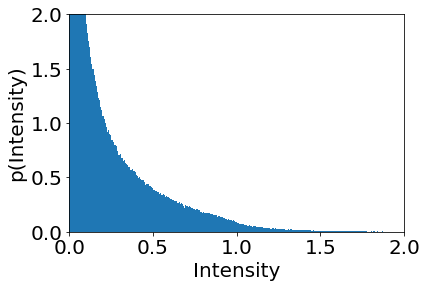

In [9]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,2))
plt.xlim((0,2))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("ThreeDN02w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [12]:
int_list.mean()

0.200281997210647

In [10]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 0.5
N_avg_L = np.sqrt(8)*N_avg*L**3/np.pi/np.sqrt(np.pi)/w**3
print(N_avg_L)

N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
rv = multivariate_normal(mean=[0,0,0],cov=[[sigma**2,0,0],[0,sigma**2,0],[0,0,sigma**2]])
int_list = [ep*sigma**3*np.sqrt(8)*np.pi*np.sqrt(np.pi)*np.sum(
                rv.pdf(np.add(np.multiply(np.random.random(n*3),L),xlim1).reshape(n,3),))
                  for n in N_draws]
int_list = np.array(int_list)

1971.1497761770688


In [15]:
print(int_list.mean())
np.savetxt("3d_05.csv",int_list, delimiter=",")

0.5002938364816888


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


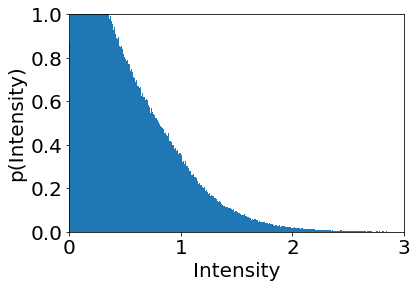

In [12]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,3))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("ThreeDN05w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [14]:
int_list.mean()

0.5002938364816888

In [16]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 1
N_avg_L = np.sqrt(8)*N_avg*L**3/np.pi/np.sqrt(np.pi)/w**3
print(N_avg_L)

N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
rv = multivariate_normal(mean=[0,0,0],cov=[[sigma**2,0,0],[0,sigma**2,0],[0,0,sigma**2]])
int_list = [ep*sigma**3*np.sqrt(8)*np.pi*np.sqrt(np.pi)*np.sum(
                rv.pdf(np.add(np.multiply(np.random.random(n*3),L),xlim1).reshape(n,3),))
                  for n in N_draws]
int_list = np.array(int_list)

3942.2995523541376


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


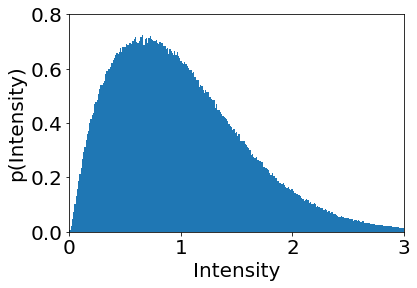

In [17]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,0.8))
plt.xlim((0,3))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("ThreeDN1w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [19]:
print(int_list.mean())
np.savetxt("3d_1.csv",int_list, delimiter=",")

1.0000676712574317


In [23]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 2
N_avg_L = np.sqrt(8)*N_avg*L**3/np.pi/np.sqrt(np.pi)/w**3
print(N_avg_L)

N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
rv = multivariate_normal(mean=[0,0,0],cov=[[sigma**2,0,0],[0,sigma**2,0],[0,0,sigma**2]])
int_list = [ep*sigma**3*np.sqrt(8)*np.pi*np.sqrt(np.pi)*np.sum(
                rv.pdf(np.add(np.multiply(np.random.random(n*3),L),xlim1).reshape(n,3),))
                  for n in N_draws]
int_list = np.array(int_list)

7884.599104708275


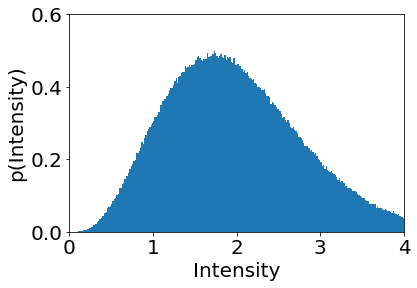

In [26]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,0.6))
plt.xlim((0,4))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("ThreeDN2w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [25]:
int_list.mean()

2.0008562713890767

In [27]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 5
N_avg_L = np.sqrt(8)*N_avg*L**3/np.pi/np.sqrt(np.pi)/w**3
print(N_avg_L)

N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
rv = multivariate_normal(mean=[0,0,0],cov=[[sigma**2,0,0],[0,sigma**2,0],[0,0,sigma**2]])
int_list = [ep*sigma**3*np.sqrt(8)*np.pi*np.sqrt(np.pi)*np.sum(
                rv.pdf(np.add(np.multiply(np.random.random(n*3),L),xlim1).reshape(n,3),))
                  for n in N_draws]
int_list = np.array(int_list)

19711.49776177069


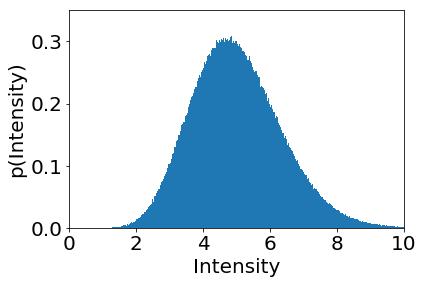

In [31]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,0.35))
plt.xlim((0,10))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("ThreeDN5w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [29]:
int_list.mean()

4.998661405888032